## Загрузка данных. Предварительный анализ

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('/content/drive/MyDrive/goodreads_train.csv')
train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


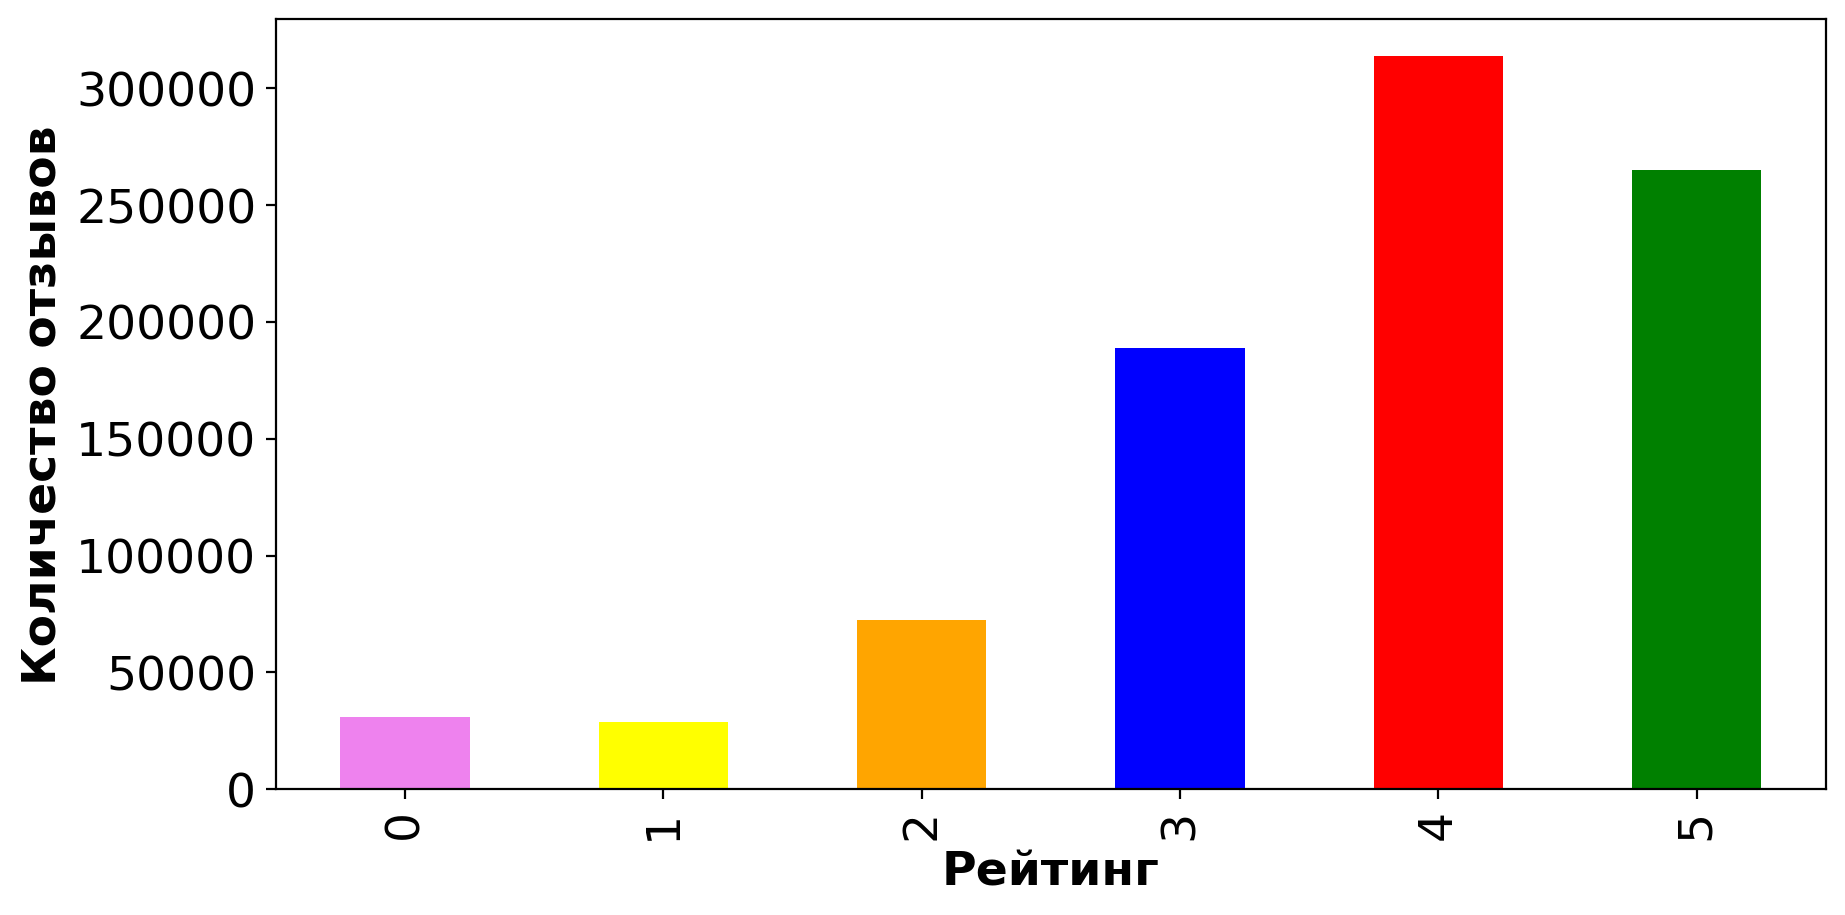

In [4]:
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
font = {'family' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)
train['rating'].value_counts().sort_index().plot.bar(figsize=(10,5), color=['violet', 'yellow', 'orange', 'blue', 'red', 'green'])
plt.xlabel('Рейтинг', fontweight='bold')
plt.ylabel('Количество отзывов', fontweight='bold')
plt.show()

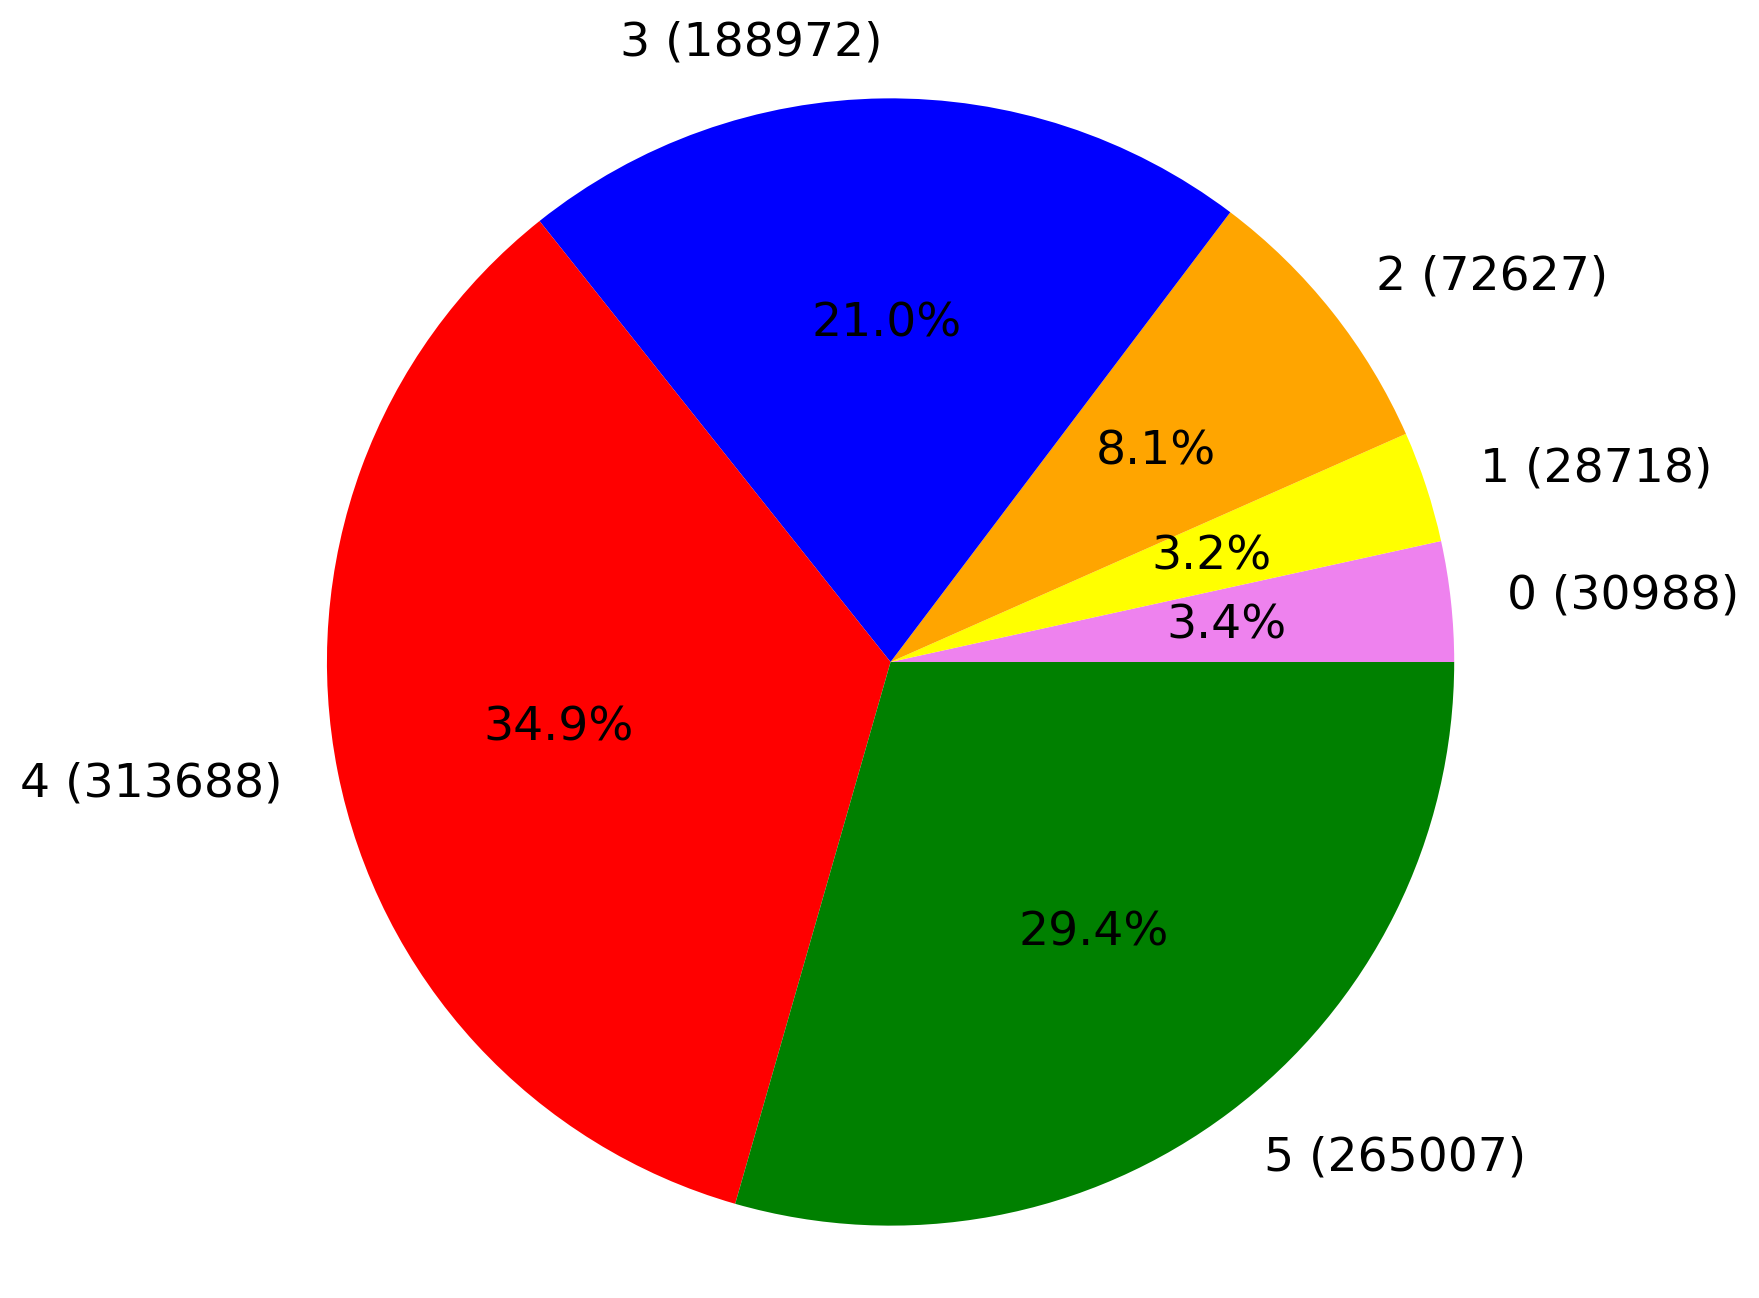

In [5]:
labels = [f'{k} ({train["rating"].sort_index().value_counts()[k]})' for k in train['rating'].value_counts().sort_index().keys()]
sizes = dict(train['rating'].value_counts().sort_index()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, colors=['violet', 'yellow', 'orange', 'blue', 'red', 'green'])
ax1.axis('equal')  
plt.show();

In [6]:
test=pd.read_csv('/content/drive/MyDrive/goodreads_test.csv')
test.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0


In [7]:
print(f"train shape = {train.shape}")
print(f"test_shape = {test.shape}")

train shape = (900000, 11)
test_shape = (478033, 10)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       478033 non-null  object
 1   book_id       478033 non-null  int64 
 2   review_id     478033 non-null  object
 3   review_text   478033 non-null  object
 4   date_added    478033 non-null  object
 5   date_updated  478033 non-null  object
 6   read_at       435555 non-null  object
 7   started_at    334989 non-null  object
 8   n_votes       478033 non-null  int64 
 9   n_comments    478033 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 36.5+ MB


In [10]:
train.drop(["user_id", "book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "n_votes", "n_comments"], inplace=True, axis=1)
train.head()

,rating,review_text
0,5,This is a special book. It started slow for ab...
1,3,Recommended by Don Katz. Avail for free in Dec...
2,3,"A fun, fast paced science fiction thriller. I ..."
3,0,Recommended reading to understand what is goin...
4,4,"I really enjoyed this book, and there is a lot..."


In [11]:
test.drop(["user_id", "book_id", "date_added", "date_updated", "read_at", "started_at", "n_votes", "n_comments"], inplace=True, axis=1)
test.head()

,review_id,review_text
0,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...
1,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink..."
2,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...
3,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...
4,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...


### Пример данных:

In [12]:
train.review_text[0]

'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal o

In [13]:
train.rating[0]

5

### Еще раз убедимся, что пропусков нет:

In [14]:
train.review_text.isnull().sum()

0

### Количество отзывов по каждому рейтингу

In [15]:
pd.unique(train['rating'])

array([5, 3, 0, 4, 2, 1])

In [16]:
print(f"Rating 0 - {train.rating[train['rating'] == 0].count()}")
print(f"Rating 1 - {train.rating[train['rating'] == 1].count()}")
print(f"Rating 2 - {train.rating[train['rating'] == 2].count()}")
print(f"Rating 3 - {train.rating[train['rating'] == 3].count()}")
print(f"Rating 4 - {train.rating[train['rating'] == 4].count()}")
print(f"Rating 5 - {train.rating[train['rating'] == 5].count()}")

Rating 0 - 30988
Rating 1 - 28718
Rating 2 - 72627
Rating 3 - 188972
Rating 4 - 313688
Rating 5 - 265007


## Очищаем данные

* переводим текст в нижний регистр
* удаляем ссылки, html-теги
* убираем ненужные символы
* ненужные повторяющиеся буквы в словах
* убираем числа > 5
* приводим слова к общему корню (lemmatization)
* удаляем стоп-слова

In [17]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-05-23 10:37:34.860974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate com

In [18]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-fudmozt9
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-fudmozt9
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7620 sha256=5c9b1ff2cbbdc5ab21187af048199c3a109750d06a53f3b787f9dd8f62926b39
  Stored in directory: /tmp/pip-ephem-wheel-cache-v1zwvp9k/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successful

In [19]:
import preprocess_kgptalkie as ps
import re

In [20]:
def to_lower(text):
    return text.lower()

train["review_text"] = train["review_text"].astype(str).apply(to_lower)
train["review_text"] = train["review_text"].astype(str).apply(to_lower)

In [21]:
contraction_mapping = {"it's":"it is","it's":"it is", "its": "it is","ain't": "not", "aren't": "are not","can't": "can not", 'cannot':'can not',"'cause": "because",
        "could've": "could have", "couldn't": "could not", "didn't": "did not",
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
        "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have",
        "i'm": "i am", "i've": "i have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
        "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is",
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
        "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
        "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
        "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
        "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
        "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
        "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": 
        "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
        "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
        "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
        "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
        "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
        "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
        "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
        "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
        "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
        "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
        "you're": "you are", "you've": "you have" }

In [22]:
def expandContractions(text):
        updatedtext = ""
        for word in text.split():
            if word in contraction_mapping:
                updatedtext += contraction_mapping[word] + " "
            else:
                updatedtext += word + " "
                
        return updatedtext[:-1]

train["review_text"] = train["review_text"].astype(str).apply(expandContractions)
test["review_text"] = test["review_text"].astype(str).apply(expandContractions)

In [23]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ') # transforming a string by making it lowercase, removing backslashes, and replacing underscores with space
    x = re.sub(r"n\'t", " not", x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x) 
    x = ps.remove_special_chars(x) # a character that is not an alphabetic or numeric character
    x = re.sub("(.)\\1{2,}", "\\1", x) # to remove consecutive occurrences of a single character from a string
    return x

In [24]:
train.review_text[0]

'this is a special book. it started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. this is what i love about good science fiction - it pushes your thinking about where things can go. it is a 2015 hugo winner, and translated from it is original chinese, which made it interesting in just a different way from most things i have read. for instance the intermixing of chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. it is a book about science, and aliens. the science described in the book is impressive - it is a book grounded in physics and pretty accurate as far as i could tell. (view spoiler)[though when it got to folding protons into 8 dimensions i think he was just making stuff up - interesting to think about though. but what would happen if our seti stations received a message - if we found someone was out there - and the person monitoring and answering the signal on ou

In [25]:
test.review_text[0]

'** spoiler alert ** This is definitely one of my favorites among the "food books" I\'ve read! I loved the characters (Raggedy Ann and Ken Carson included)! Even though Kayla is a pessimist (which I usually dislike in a character), her personality is the perfect formula in the story. Kayla is the school rebel, she wears unusual clothes, makes fun of the "popular" crowd in school, and she only have one friend in school---Nicole. Lately, things have been changing around her. Her mother barely talks to her and her best friend is dating her long-time crush Ben! On her disastrous 16th birthday party, she made a wish to make all her birthday wishes come true. The following day she wakes up with a pink pony on her backyard! The next day it was a room full of gumballs, and the next her Raggedy doll Ann was brought to life! She figured out that her birthday wishes are coming true and she have to find a way to stop it before her 15th birthday wish comes true---which is a kiss from Ben! I really 

In [26]:
train['review_text'] = train['review_text'].apply(lambda x:get_clean(x))
test['review_text'] = test['review_text'].apply(lambda x:get_clean(x))

In [27]:
train.review_text[0]

'this is a special book it started slow for about the first third then in the middle third it started to get interesting then the last third blew my mind this is what i love about good science fiction it pushes your thinking about where things can go it is a 2015 hugo winner and translated from it is original chinese which made it interesting in just a different way from most things i have read for instance the intermixing of chinese revolutionary history how they kept accusing people of being reactionaries etc it is a book about science and aliens the science described in the book is impressive it is a book grounded in physics and pretty accurate as far as i could tell view spoilerthough when it got to folding protons into 8 dimensions i think he was just making stuff up interesting to think about though but what would happen if our seti stations received a message if we found someone was out there and the person monitoring and answering the signal on our side was disillusioned that p

In [28]:
test.review_text[0]

'spoiler alert this is definitely one of my favorites among the food books ive read i loved the characters raggedy ann and ken carson included even though kayla is a pessimist which i usually dislike in a character her personality is the perfect formula in the story kayla is the school rebel she wears unusual clothes makes fun of the popular crowd in school and she only have one friend in schoolnicole lately things have been changing around her her mother barely talks to her and her best friend is dating her longtime crush ben on her disastrous 16th birthday party she made a wish to make all her birthday wishes come true the following day she wakes up with a pink pony on her backyard the next day it was a room full of gumballs and the next her raggedy doll ann was brought to life she figured out that her birthday wishes are coming true and she have to find a way to stop it before her 15th birthday wish comes truewhich is a kiss from ben i really had fun reading it it reminded me a lot 

### Lemmatization
(в последнмх вариантах пропустила лемматизацию из-за очень долгого выполнения)


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [31]:
# import pandas as pd
# import numpy as np
# train = pd.read_csv('/content/drive/MyDrive/goodreads_train_preprocessed_cleaned_0.csv')
# test = pd.read_csv('/content/drive/MyDrive/goodreads_test_preprocessed_cleaned_0.csv')
# train.head()

### Убираем stopwords

In [32]:
# import nltk
# from nltk.corpus import stopwords

# nltk.download('stopwords')

# stop_words = list(stopwords.words('english'))
# stop_words

In [33]:
# stop_words.remove("no")
# stop_words.remove("not")

# stop_words.append("spoiler")
# stop_words.append("hide")
# stop_words.append("view")
# stop_words.append("alert")
# stop_words.append("book")
# stop_words.append("read")
# # stop_words.append("star")
# stop_words.append("coffee")
# stop_words.append("name")
# stop_words.append("friend")
# stop_words.append("character")
# stop_words.append("object")
# stop_words.append("thing")
# stop_words.append("review")
# stop_words.append("think")
# stop_words.append("fiction")
# stop_words.append("thriller")
# stop_words.append("adult")
# stop_words.append("child")
# stop_words.append("free")
# stop_words.append("author")
# stop_words.append("travel")
# stop_words.append("start")
# stop_words.append("finish")
# stop_words.append("update")
# stop_words.append("plot")
# stop_words.append("story")


In [34]:
# len(stop_words)

In [35]:
# train["review_text"] = train["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# test["review_text"] = test["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [36]:
stop = {'a', 'the', 'www', 'http', 'https', 'com'}

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop])

train["review_text"] = train["review_text"].apply(remove_stopwords)
test["review_text"] = test["review_text"].apply(remove_stopwords)

### Сохраним промежуточные данные

In [37]:
# train.to_csv('/content/drive/MyDrive/goodreads_train_preprocessed_cleaned.csv', index=False) 
# test.to_csv('/content/drive/MyDrive/goodreads_train_preprocessed_cleaned.csv', index=False) 

###Определение модели

In [38]:
import tensorflow as tf

In [39]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Running on TPU  grpc://10.59.116.154:8470
Number of replicas: 8


In [40]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from transformers import TFAutoModel, AutoTokenizer

roberta_model = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(roberta_model)

In [42]:
MAX_LEN = 128


In [43]:
train_tokens = [tokenizer(item, 
                    max_length = MAX_LEN, 
                    padding = 'max_length', 
                    truncation = True, 
                    return_tensors = 'np')['input_ids'].reshape(MAX_LEN)
                    for _, item in train.review_text.items()]

In [44]:
test_tokens = [tokenizer(item, 
                    max_length = MAX_LEN, 
                    padding = 'max_length', 
                    truncation = True, 
                    return_tensors = 'np')['input_ids'].reshape(MAX_LEN)
              for _, item in test.review_text.items()]

In [45]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(train['rating'])
y.shape

(900000, 6)

In [ ]:
import tensorflow as tf
from transformers import TFRobertaModel
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

with strategy.scope():

    input_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32)

    encoder = TFRobertaModel.from_pretrained(roberta_model)
    embedding = encoder(input_ids)[0]
    
    # lstm_output = LSTM(128)(embedding)
    # lstm_output = Dropout(0.3)(lstm_output)

    dropout_output = Dropout(0.3)(embedding)

    dense_output = Dense(64, activation='relu')(dropout_output)
    dense_output = Dropout(0.3)(dense_output)
    dense_output = Dense(32, activation='relu')(dense_output)
    dense_output = Dropout(0.3)(dense_output)
    output = Dense(y.shape[1], activation='softmax')(dense_output)

    model = tf.keras.Model(inputs=input_ids, outputs=output)

    optimizer = Adam(learning_rate=1e-5)
    loss = 'categorical_crossentropy'
    metrics = ['accuracy']
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()


You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience = 5, restore_best_weights = True, verbose = 1)
reduce_lr = ReduceLROnPlateau(factor = 0.1, patience = 2, mode = 'min', verbose = 1)

In [ ]:
history = model.fit(np.asarray(train_tokens), 
                    y, 
                    epochs = 10,
                    verbose = 1,
                    validation_split = 0.15,
                    batch_size = 64 * strategy.num_replicas_in_sync,
                    callbacks = [reduce_lr, early_stop])

In [ ]:
submission = pd.DataFrame()
submission['review_id'] = test.review_id
submission['rating'] = [np.argmax(i) for i in model.predict(np.asarray(test_tokens))]

In [ ]:
submission.to_csv("submission.csv", index = False)